In [1]:
import numpy as np
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
from os import listdir
from skimage.transform import resize
from sklearn import preprocessing

%matplotlib inline

In [26]:
def data_preprocess(folders, dimensions, max_images=10, flat=False):

    images = []
    components = []
    labels = []
    
    for folder in folders:
        path = '/Users/millie/Documents/Galvanize/Capstone_2/images/select/'+folder
        directory = listdir(path)[:max_images]
        print(directory)
        
        for item in directory:
            if item == '.DS_Store':
                pass
            else:
                img = skimage.io.imread(path+'/'+item)
                
            #img_shp_desired = (100, 100, 3)
            img_resized = resize(img, dimensions, mode='constant')
            flatten = img_resized.reshape(img_resized.size)

            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
            ax.imshow(img_resized);
            images.append(img_resized)
            labels.append(folder)
            components.append(flatten)
            
    if flat:
        return np.array(components), labels
    else:
        return np.array(images), labels
    


['214.png', '201.png', '177.png', '149.png', '161.png', '60.png', '48.png', '216.png', '61.png', '174.png', '148.png', '170.png', '212.png', '213.png', '171.png', '165.png', '173.png', '167.png', '198.png', '172.png']


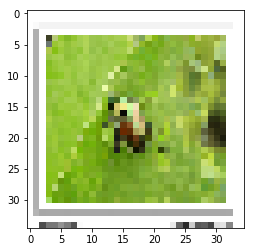

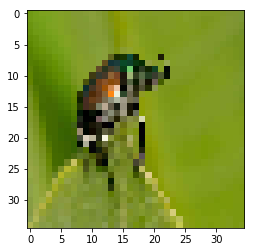

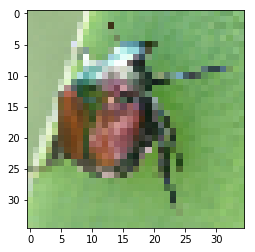

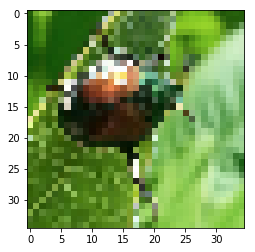

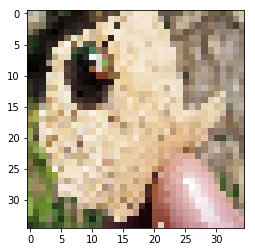

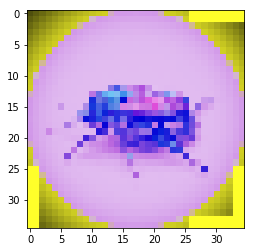

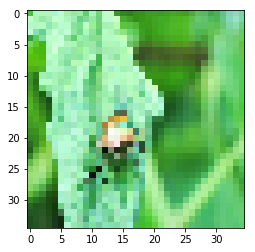

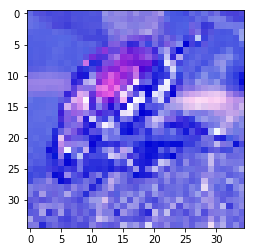

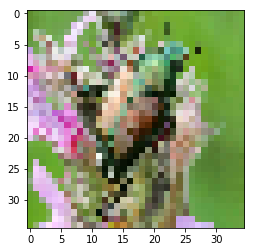

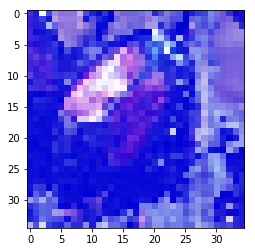

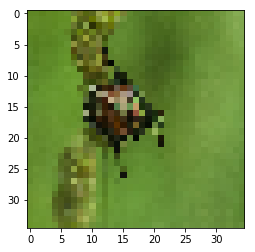

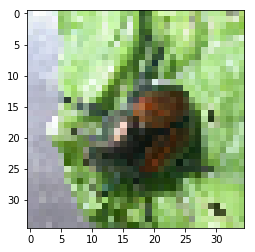

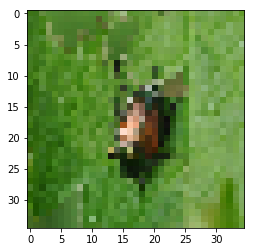

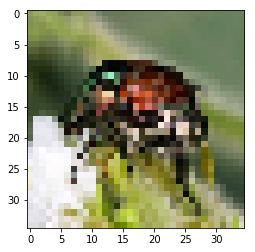

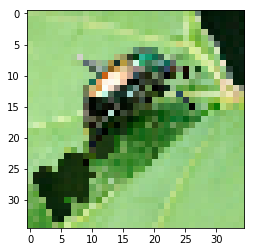

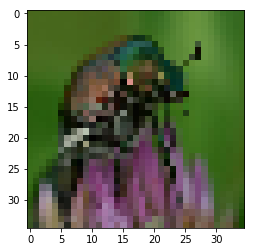

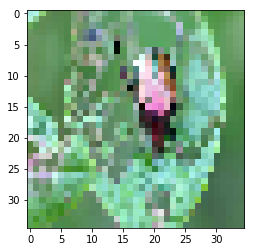

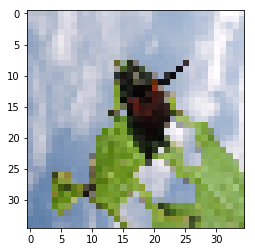

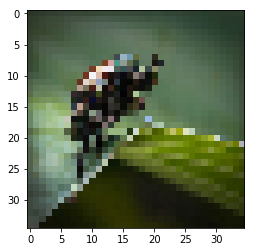

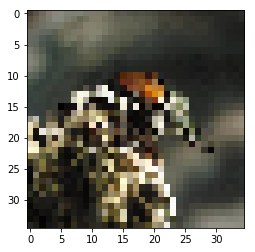

In [30]:
components, y = data_preprocess(['japanese_beetle'], (35,35,3), 20, False)

In [252]:
components.shape

(300, 30000)

In [198]:
y

['bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'bee',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',
 'cucumber_beetle',


In [254]:
import matplotlib.pyplot as plt


In [255]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

In [256]:
X_scaled = scaler.fit_transform(components) # standardize data

In [257]:
pca = PCA(n_components=100) #pca object
X_pca = pca.fit_transform(X_scaled) # from 4 features to 2 PCA features

print("\nData after PCA into 2 components")
print("PC1\tPC2")
for i in range(5):
    print("{0:0.1f}\t{1:0.1f}".format(X_pca[i,0], X_pca[i,1]))


Data after PCA into 2 components
PC1	PC2
-23.6	-52.4
37.6	-6.8
-60.6	-70.2
57.2	83.2
-96.2	-44.6


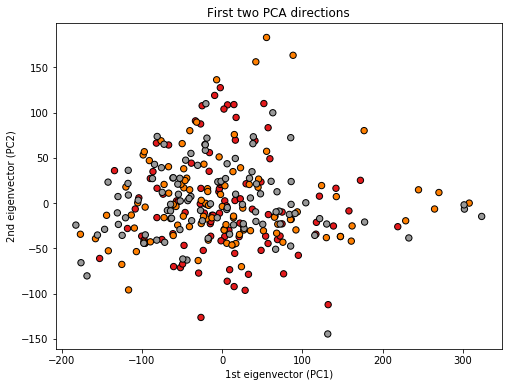

In [258]:
le = preprocessing.LabelEncoder()
le.fit(["bee", "cucumber_beetle", "ladybug"])
list(le.classes_)
cm = le.transform(y) 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cm,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

In [259]:
evr = pca.explained_variance_ratio_
print(evr)
print("The 2 principal components explain {0:0.1f}%"
      " of the variance in the original data.".format(evr.sum()*100))

[0.26215632 0.07671464 0.05076303 0.04641022 0.03656573 0.03217008
 0.02220431 0.01800174 0.0154149  0.01422433 0.01269771 0.01046899
 0.00977191 0.00914965 0.00906827 0.00841176 0.00810016 0.00756011
 0.00712065 0.00649485 0.00637754 0.00620723 0.0060866  0.00576244
 0.0053947  0.0051208  0.00489761 0.00472424 0.00461473 0.00445424
 0.00442281 0.00419834 0.0040129  0.00383163 0.00380214 0.00366878
 0.00355804 0.003469   0.00338741 0.00334955 0.00319197 0.00314127
 0.00309141 0.00303107 0.00291068 0.00283374 0.00279305 0.00273333
 0.00269837 0.00266347 0.00263292 0.0025929  0.00250944 0.00248066
 0.00244618 0.00239787 0.00233069 0.00230987 0.00224327 0.00223395
 0.00218232 0.00213226 0.0021236  0.00209933 0.00206035 0.00204939
 0.00198361 0.0019763  0.00193388 0.0019294  0.00190097 0.00187279
 0.00183685 0.00181622 0.00178675 0.00175965 0.00172685 0.00172257
 0.00168675 0.00167258 0.00163633 0.00162015 0.00159769 0.00158354
 0.00154518 0.00153605 0.00151578 0.00149339 0.00145994 0.0014